In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_dir = '/content/drive/My Drive/CANCER'
!ls '/content/drive/MyDrive/CANCER'

Original  Segmented


In [ ]:
batch_size = 32
img_height = 100
img_width = 100

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 646 files belonging to 2 classes.
Using 517 files for training.
Found 646 files belonging to 2 classes.
Using 129 files for validation.


In [ ]:
class_names = train_ds.class_names
class_names

['Original', 'Segmented']

In [ ]:
model = models.Sequential([
layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(128, 3, activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(1024, activation='relu'),
layers.Dense(len(class_names), activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


17/17 ━━━━━━━━━━━━━━━━━━━━ 101s 6s/step - accuracy: 0.8330 - loss: 1.1920 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.9996 - loss: 0.0054 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.9975 - loss: 0.0248 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 

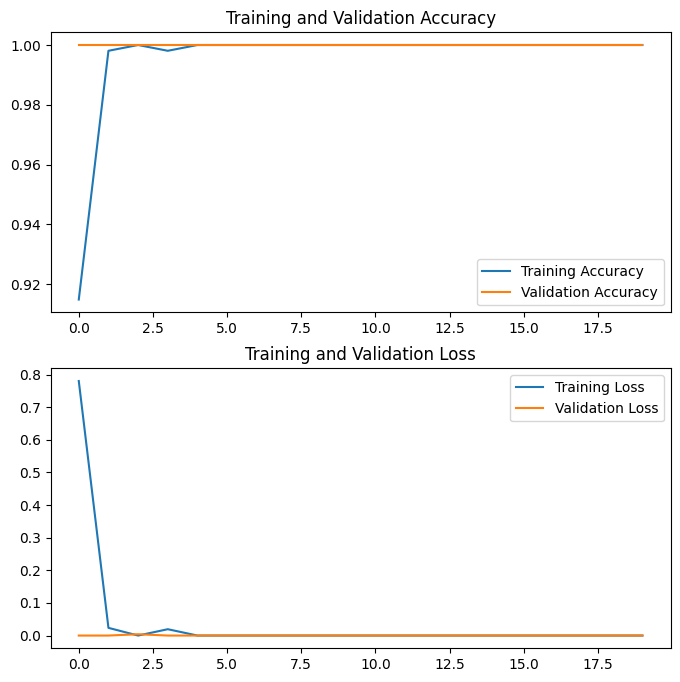

Maximum Validation Accuracy: 1.0


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


print("Maximum Validation Accuracy:", max(val_acc))

In [ ]:
print("Maximum Validation Accuracy:", max(val_acc))

Maximum Validation Accuracy: 1.0


In [ ]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [ ]:
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>